<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/Copy_of_jkh_prediction_with_CNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

data=np.load(path+'datajkh1.npy')
target=np.load(path+'targetjkh1.npy')

In [ ]:
print(data.shape)
print(target.shape)
print(data.shape[1:])

(2554, 50, 4)
(2554,)
(50, 4)


In [ ]:
train_data=data[:1787]
train_target=target[:1787]

test_data=data[1787:]
test_target=target[1787:]

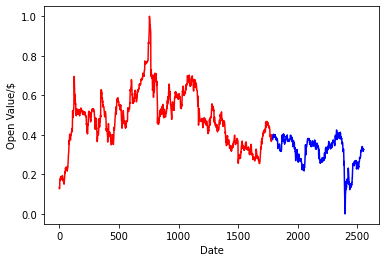

In [ ]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1787,2554,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dense,Dropout,Activation,Flatten

model=Sequential()

model.add(Conv1D(filters=128,kernel_size=3,input_shape=(data.shape[1:])))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

"""model.add(Conv1D(filters=256,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
"""

"""model.add(Conv1D(filters=128,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
"""
"""model.add(Conv1D(filters=64,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))"""
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam',metrics=['Accuracy','mse', 'mae', 'mape'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 48, 128)           1664      
_________________________________________________________________
activation (Activation)      (None, 48, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3073      
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
______________________________________________________

In [ ]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
51/51 [==============================] - 31s 13ms/step - loss: 0.0822 - accuracy: 0.0000e+00 - mse: 0.0822 - mae: 0.2078 - mape: 41.5195 - val_loss: 0.0022 - val_accuracy: 0.0000e+00 - val_mse: 0.0022 - val_mae: 0.0421 - val_mape: 12.2968
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.0000e+00 - mse: 0.0064 - mae: 0.0623 - mape: 12.6680 - val_loss: 0.0014 - val_accuracy: 0.0000e+00 - val_mse: 0.0014 - val_mae: 0.0331 - val_mape: 9.2786
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - mse: 0.0046 - mae: 0.0528 - mape: 10.6896 - val_loss: 0.0011 - val_accuracy: 0.0000e+00 - val_mse: 0.0011 - val_mae: 0.0298 - val_mape: 8.5363
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - mse: 0.0038 - mae: 0.0472 - mape: 9.5559 - val_loss: 8.7369e-04 - val_accuracy: 0.0000e+00 - val_mse: 8.7369e-04 - val_mae: 0.0264 - val_mape: 7.662

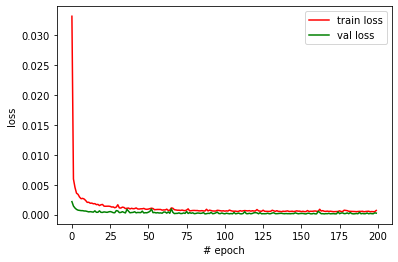

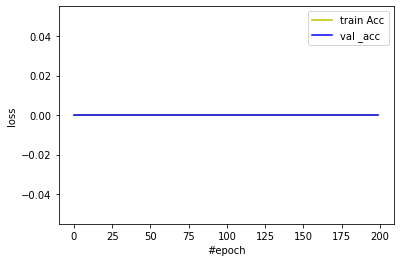

In [ ]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],'y',label='train Acc')
plt.plot(history.history['val_accuracy'],'b',label='val _acc')
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9414095576559408


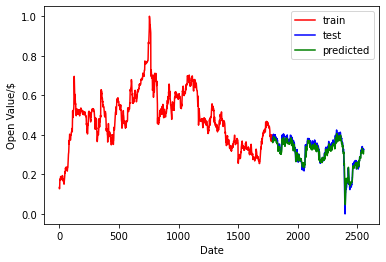

In [ ]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1787,2554,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

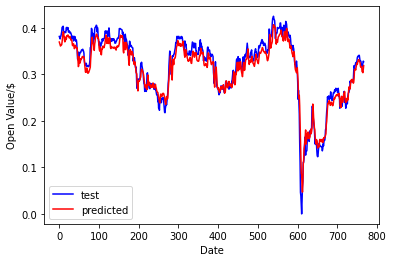

In [ ]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()